# Taniya kapoor
# e random variable Importance Sampling

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
R = 1000

U = np.random.uniform(0,1,R)

br = 1.2               #Remanent magnetic flux density of the magnet (T)
#br_min = br - 0.05*br
#br_max = br + 0.05*br


e=0.5e-3             #air gap between the core and the yoke (m)
e_min = e - 0.15*e
e_max = e + 0.15*e

e = np.zeros(R)
for i in range(R):
    e[i]= ((e_max/e_min)**U[i])*e_min;


ep=5e-5  #Parasitic air gap (m)
#ep_min = ep - 0.4*ep
#ep_max = ep + 0.4*ep


haim=10e-3    #height of the magnet (m)
#haim_min = haim - 0.05*haim
#haim_max = haim + 0.05*haim


current=0.0652                                  #current in the coil
#current_min = current - 0.1*current
#current_max = current + 0.1*current



In [3]:
rcul=8.8e-3                                        #radius of the iron core (m)
rbob=17e-3                                        #external radius of the coil (m)
rclo=20e-3                                        #external radius (m)
raim=9.4e-3                                      #Radius of the magnet (m)
hclo=6e-3                                       #height of base of the yoke (m)
hent=6e-3                                      #height of the air gap e (m)
hbob=9e-3                                       #height of the coil (m)
hpm=5e-3                                        #height of the mobil plate (m)
mur=3000                                        #relative permeability of the yoke
n=3200                                        #number of turns
#CONSTANTS
#permeability of the air
mu0=4*np.pi*1e-7
Re=e/(mu0*2*np.pi*(rbob-e)*hent)                                  #reluctance of the airgap
Rp=ep/(mu0*np.pi*rcul*rcul)+ep/(mu0*np.pi*(rclo*rclo-rbob*rbob))  #reluctance of the paraistic airgap
Ra=haim/(mu0*np.pi*raim*raim)                                     #reluctance of the magnet
ksia=br*haim/mu0                                                #magnetomotive force of the magnet
#Not supplied
#Calculation of the flux
#flux flowing through the permanent magnet
phia1=((Rp+Re)*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
#magnetic flux in the mobil plate
phib1=-(Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
force1=np.abs((phib1*phib1)/(2*mu0*np.pi*rcul*rcul)+phib1*phib1/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
#Supplied by a current
#Calculation of the flux
#flux flowing through the permanent magnet
phia2=((Rp+Re)*(ksia)-(Re*n*current))/((Ra*Rp)+(Ra*Re)+(Re*Rp))
#magnetic flux in the mobil plate
phib2=((Ra+Re)*n*current-Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
#calculation of the force
force2=np.abs((phib2*phib2)/(2*mu0*np.pi*rcul*rcul)+phib2*phib2/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
m1 = np.mean(force1)
m2 = np.mean(force2)
s1 = np.std(force1)/np.sqrt(R)
s2 = np.std(force2)/np.sqrt(R)
convf1 = s1/R
convf2 = s2/R

f = np.zeros(R)
g = np.zeros(R)
for i in range(R):
    f[i]=1/(e_max-e_min);
    g[i]=1/(np.log(e_max/e_min))/e[i]
    force1[i]=force1[i]*f[i]/g[i];
    force2[i]=force2[i]*f[i]/g[i];

mean for force1 146.7537014197298
mean for force2 1.1333620886549898
standard deviation for force1 by sqrt R 0.24719737048528048
standard deviation for force2 by sqrt R 0.03436837575366228


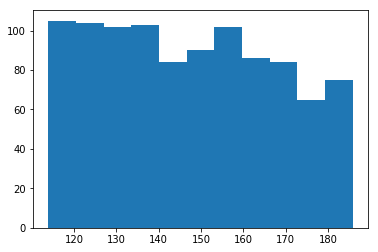

In [4]:
plt.hist(force1,bins = 'auto')
#plt.hist(force2, bins = 'auto')
#plt.show()
print("mean for force1",m1)
print("mean for force2",m2)
print("standard deviation for force1 by sqrt R",s1)
print("standard deviation for force2 by sqrt R",s2)


